In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def accuracy(y_test, y_pred):
    return np.sum(y_pred == y_test) / len(y_test)

### Perceptron

In [3]:
class Perceptron:
    def __init__(self, learning_rate=0.01, max_epochs=1000):
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs
        self.weights = None
        self.bias = None
        self.iteration = 1

    def activation(self, x):
        return 1 if x >= 0 else 0
    
    def forward_propagation(self, x):
        return self.activation(np.dot(self.weights, x) + self.bias)
    
    def back_propagation(self, x, y, y_hat):
        self.weights += self.learning_rate * (y - y_hat) * x
        self.bias += self.learning_rate * (y - y_hat)

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        self.converged = False


        for _ in range(self.max_epochs):
            errors = 0
            for i in range(len(X)):
                y_hat = self.forward_propagation(X[i])
                self.back_propagation(X[i], y[i], y_hat)
                errors += int(y[i] != y_hat)
            if errors == 0:
                self.converged = True
                break
            print(f"Iteration: {self.iteration} | Weights: {self.weights} | Bias: {self.bias}")
            self.iteration += 1
            self.decision_boundary(X, y)

    def predict(self, X):
        y_pred = []
        for x in X:
            y = self.forward_propagation(x)
            y_pred.append(y)
        return np.array(y_pred)
    
    def no_of_iterations(self):
        return self.iteration
    
    def decision_boundary(self, X, y):
        x1 = np.array([np.min(X[:, 0]), np.max(X[:, 0])])
        x2 = - (self.weights[0] * x1 + self.bias) / self.weights[1]
        plt.plot(x1, x2, label='Decision Boundary')
        plt.scatter(X[:, 0], X[:, 1], c=y, label='Data Points')
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.legend()
        plt.show()
        
        

In [4]:
# X and Y for AND gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([0, 0, 0, 1])

Iteration: 1 | Weights: [0.01 0.01] | Bias: 0.0


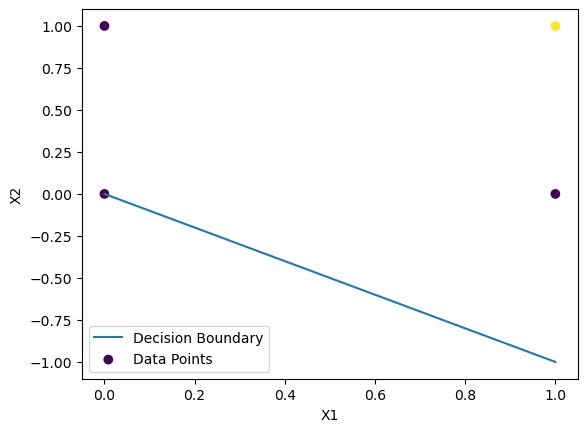

Iteration: 2 | Weights: [0.02 0.01] | Bias: -0.01


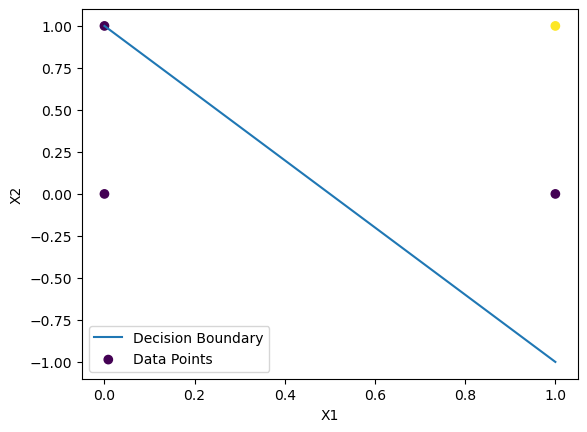

Iteration: 3 | Weights: [0.02 0.01] | Bias: -0.019999999999999997


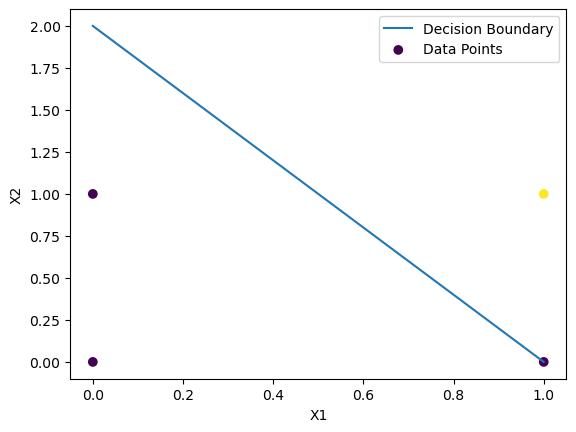

Iteration: 4 | Weights: [0.02 0.02] | Bias: -0.019999999999999997


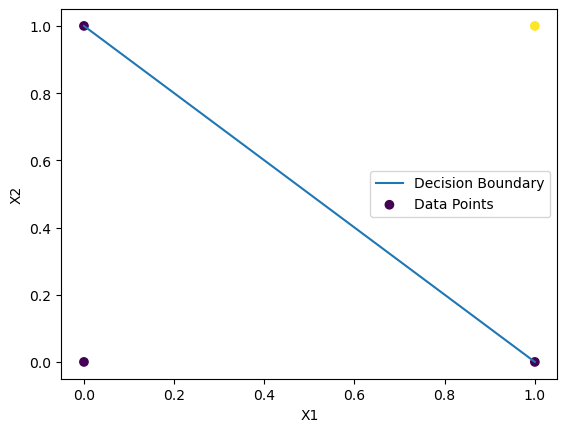

Iteration: 5 | Weights: [0.02 0.01] | Bias: -0.03


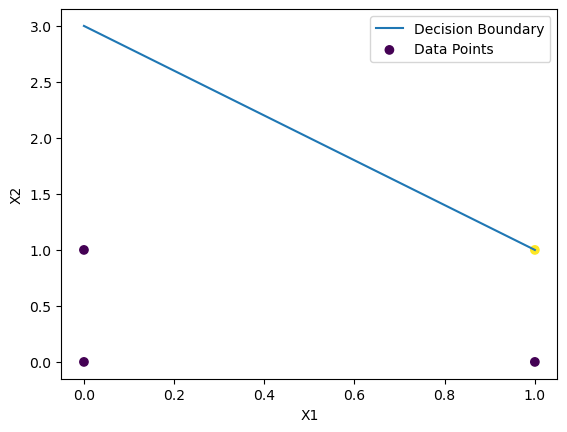

In [5]:
perceptron = Perceptron()
perceptron.fit(X, Y)

In [6]:
y_pred = perceptron.predict(X)
print(f"Predicted: {y_pred}")
print(f"Actual: {Y}")

Predicted: [0 0 0 1]
Actual: [0 0 0 1]


In [7]:
acc = accuracy(Y, y_pred)
print(f"Accuracy percentage: {acc * 100}%")

Accuracy percentage: 100.0%


### LienarSVM

In [8]:
class LinearSVM:
    def __init__(self, learning_rate=0.01, max_epochs=1000):
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        self.iteration = 1

    def activation(self, x):
        return 1 if x >= 0 else 0
        

    def fit(self, X, Y):
        for _ in range(self.max_epochs):
            for i in range(len(X)):
                if Y[i] * (np.dot(self.weights, X[i]) + self.bias) >= 1:
                    self.weights -= self.learning_rate * (2 * 1 / self.iteration * self.weights)
                else:
                    self.weights -= self.learning_rate * (2 * 1 / self.iteration * self.weights - np.dot(X[i], Y[i]))
                    self.bias -= self.learning_rate * Y[i]
            print(f"Iteration: {self.iteration} | Weights: {self.weights} | Bias: {self.bias}")
            self.iteration += 1
            # self.decision_boundary(X, Y)

    def predict(self, X):
        y_pred = []
        for x in X:
            y = self.activation(np.dot(self.weights, x) + self.bias)
            y_pred.append(y)
        return np.array(y_pred)
    
    def decision_boundary(self, X, y):
        x1 = np.array([np.min(X[:, 0]), np.max(X[:, 0])])
        x2 = - (self.weights[0] * x1 + self.bias) / self.weights[1]
        plt.plot(x1, x2, label='Decision Boundary')
        plt.scatter(X[:, 0], X[:, 1], c=y, label='Data Points')
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.legend()
        plt.show()
    

In [9]:
svm = LinearSVM()
svm.fit(X, Y)

Iteration: 1 | Weights: [0.01 0.01] | Bias: -0.01
Iteration: 2 | Weights: [0.01960596 0.01960596] | Bias: -0.02
Iteration: 3 | Weights: [0.02908834 0.02908834] | Bias: -0.03
Iteration: 4 | Weights: [0.03851092 0.03851092] | Bias: -0.04
Iteration: 5 | Weights: [0.04789843 0.04789843] | Bias: -0.05
Iteration: 6 | Weights: [0.05726297 0.05726297] | Bias: -0.060000000000000005
Iteration: 7 | Weights: [0.06661134 0.06661134] | Bias: -0.07
Iteration: 8 | Weights: [0.07594772 0.07594772] | Bias: -0.08
Iteration: 9 | Weights: [0.08527488 0.08527488] | Bias: -0.09
Iteration: 10 | Weights: [0.09459472 0.09459472] | Bias: -0.09999999999999999
Iteration: 11 | Weights: [0.10390863 0.10390863] | Bias: -0.10999999999999999
Iteration: 12 | Weights: [0.11321764 0.11321764] | Bias: -0.11999999999999998
Iteration: 13 | Weights: [0.12252252 0.12252252] | Bias: -0.12999999999999998
Iteration: 14 | Weights: [0.13182389 0.13182389] | Bias: -0.13999999999999999
Iteration: 15 | Weights: [0.14112224 0.14112224]

Iteration: 143 | Weights: [1.10913462 1.10913462] | Bias: -1.2100000000000009
Iteration: 144 | Weights: [1.10851856 1.10851856] | Bias: -1.2100000000000009
Iteration: 145 | Weights: [1.10790709 1.10790709] | Bias: -1.2100000000000009
Iteration: 146 | Weights: [1.10730015 1.10730015] | Bias: -1.2100000000000009
Iteration: 147 | Weights: [1.10669766 1.10669766] | Bias: -1.2100000000000009
Iteration: 148 | Weights: [1.10609956 1.10609956] | Bias: -1.2100000000000009
Iteration: 149 | Weights: [1.1055058 1.1055058] | Bias: -1.2100000000000009
Iteration: 150 | Weights: [1.10491632 1.10491632] | Bias: -1.2100000000000009
Iteration: 151 | Weights: [1.11433105 1.11433105] | Bias: -1.2200000000000009
Iteration: 152 | Weights: [1.11374467 1.11374467] | Bias: -1.2200000000000009
Iteration: 153 | Weights: [1.11316244 1.11316244] | Bias: -1.2200000000000009
Iteration: 154 | Weights: [1.11258429 1.11258429] | Bias: -1.2200000000000009
Iteration: 155 | Weights: [1.11201016 1.11201016] | Bias: -1.22000

In [10]:
y_pred = svm.predict(X)
print(f"Predicted: {y_pred}")
print(f"Actual: {Y}")

Predicted: [0 0 0 1]
Actual: [0 0 0 1]


In [11]:
acc = accuracy(Y, y_pred)
print(f"Accuracy percentage: {acc * 100}%")

Accuracy percentage: 100.0%
